In [1]:
# LOAD THE DATA
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\datascience2025\assignments\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# EDA1
df.shape

(891, 12)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#THERE ARE OUTLIERS LET'S USE FILLNA TO REMOVE THEM

In [8]:
df=df.fillna(1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.isnull().sum()
# NO OUTLIERS

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

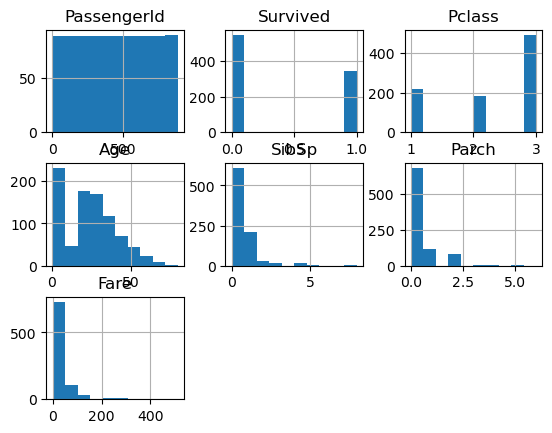

In [10]:
df.hist()

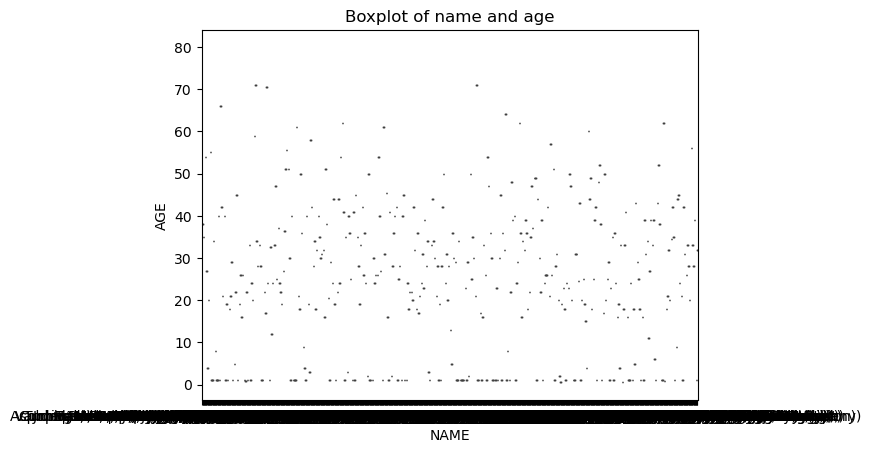

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='Name', y='Age', data=df)
plt.xlabel("NAME")
plt.ylabel("AGE")
plt.title("Boxplot of name and age")
plt.show()

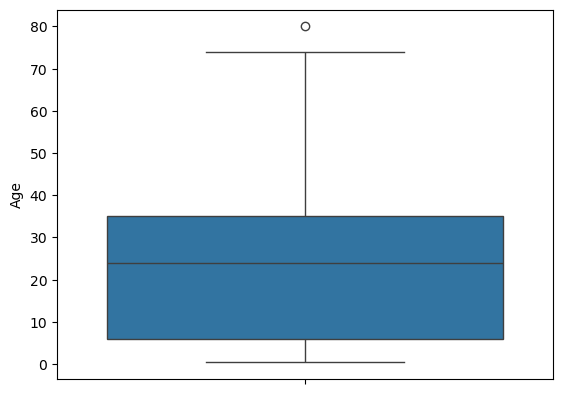

In [12]:
sns.boxplot(df['Age'])
plt.show()

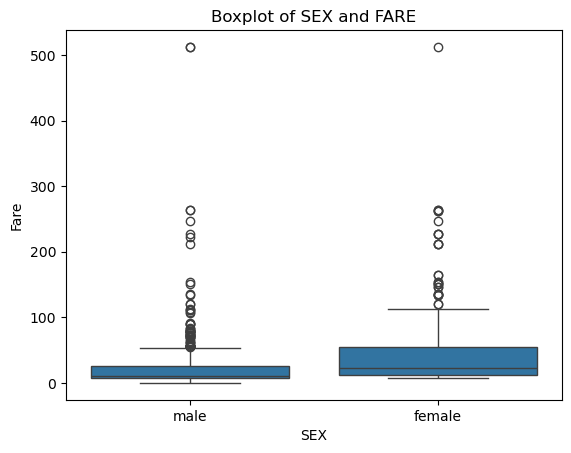

In [13]:
sns.boxplot(x='Sex', y='Fare', data=df)
plt.xlabel("SEX")
plt.ylabel("Fare")
plt.title("Boxplot of SEX and FARE")
plt.show()

# THERE ARE SOME OUTLIERS UN SEX BOTH MEN AND WOMEN

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

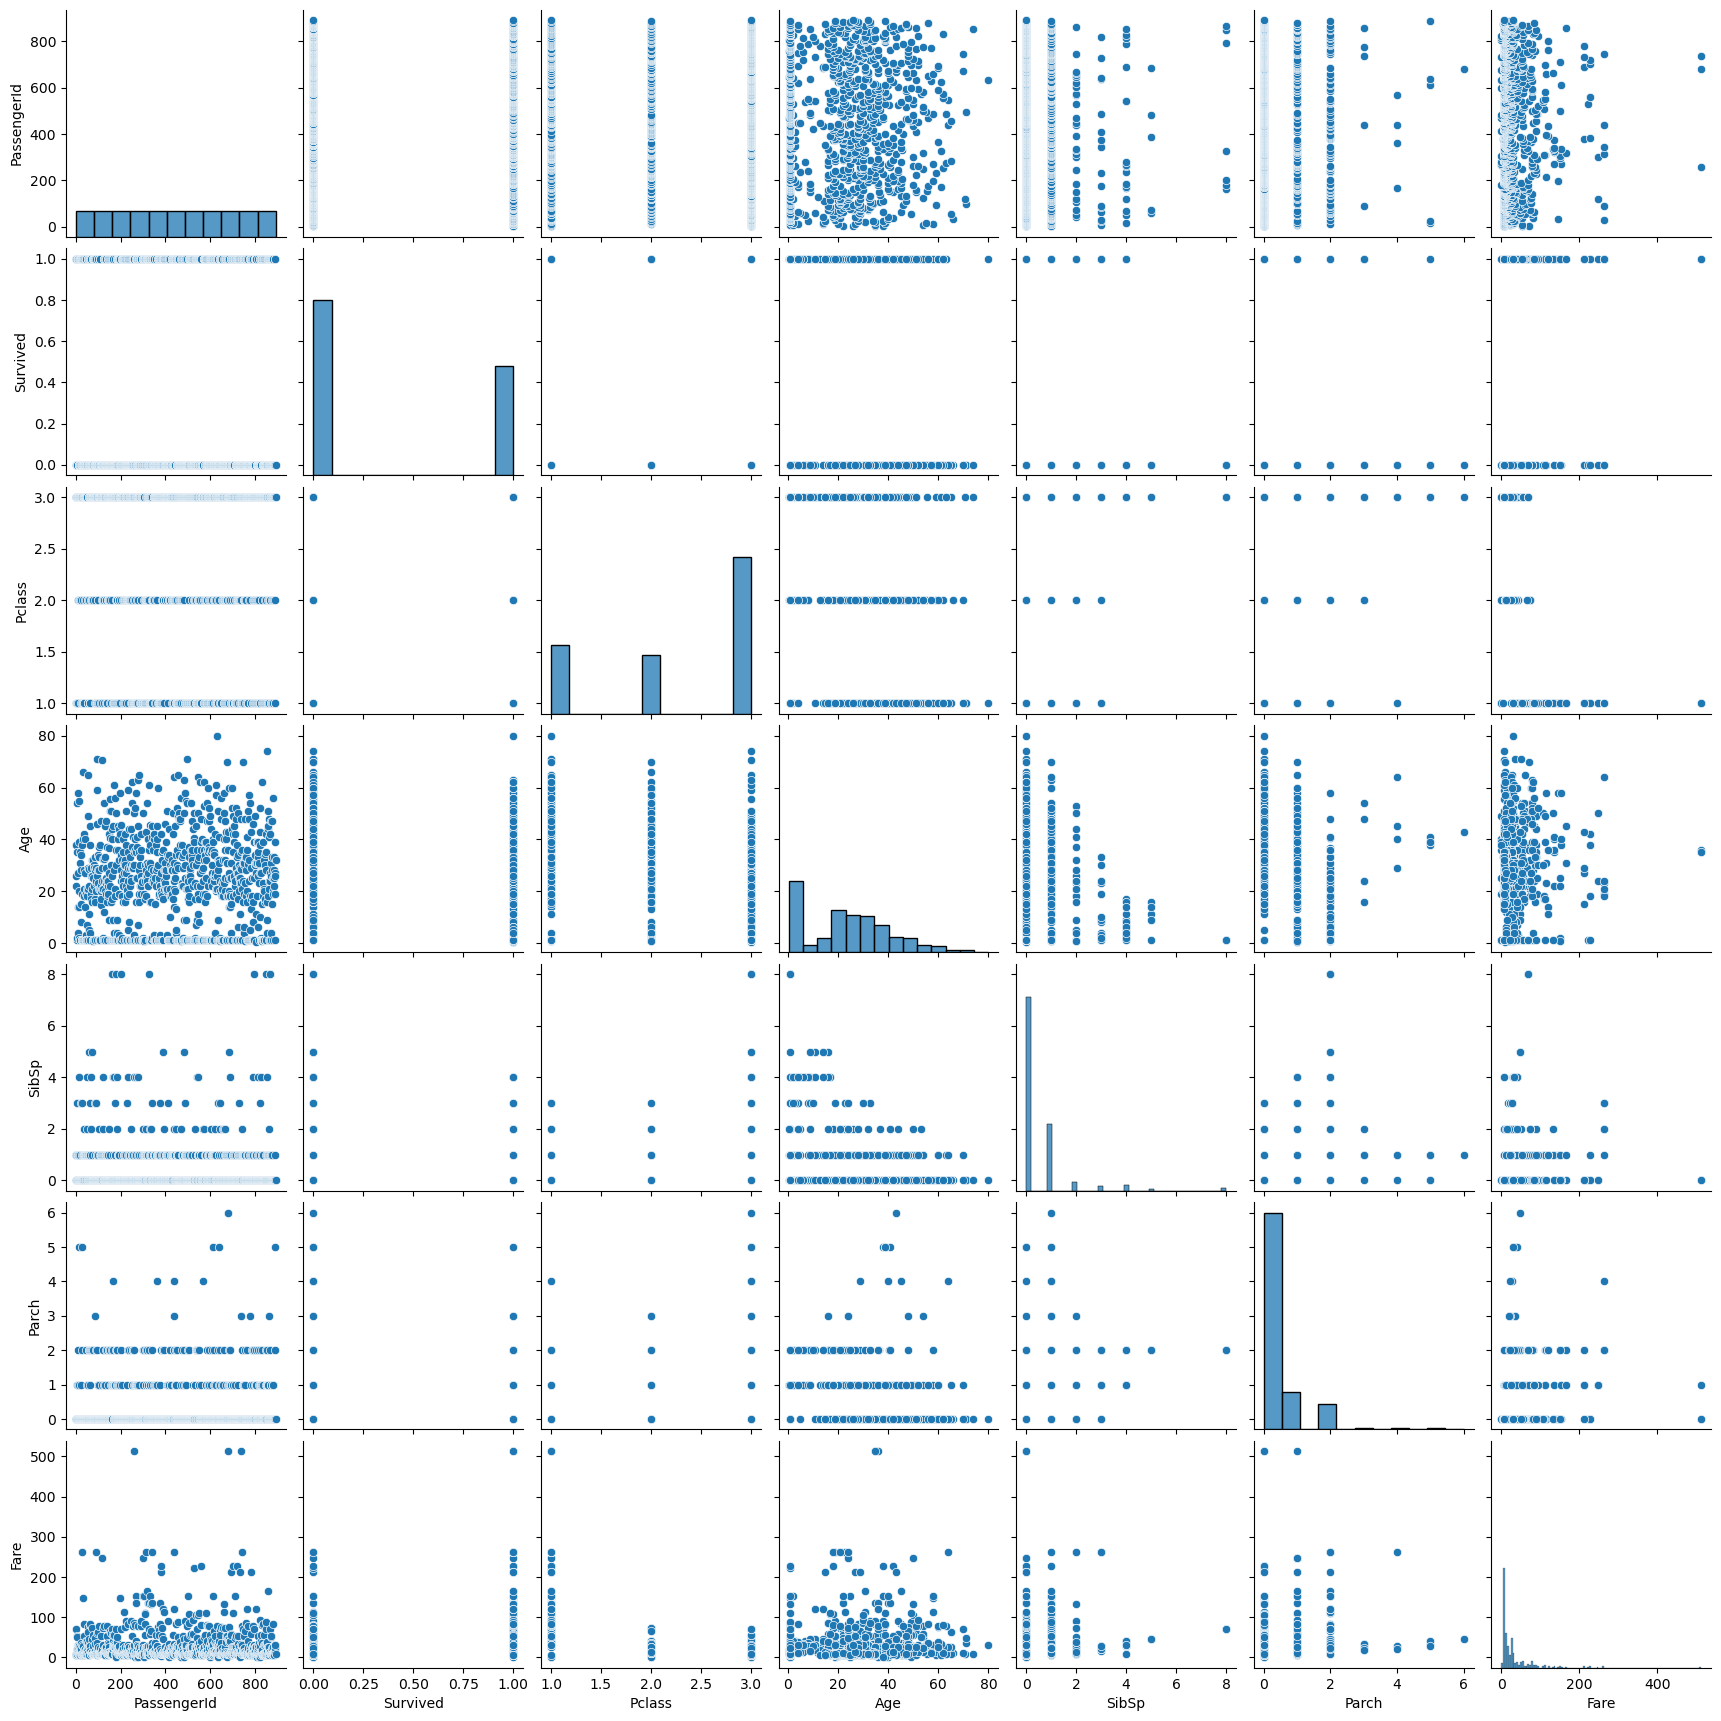

In [16]:
sns.pairplot(data=df)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,190,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,272,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,15,male,35.0,0,0,373450,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.0,0,0,211536,13.0000,1,S
887,888,1,1,303,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,413,female,1.0,1,2,W./C. 6607,23.4500,1,S
889,890,1,1,81,male,26.0,0,0,111369,30.0000,C148,C


In [18]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,190,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,272,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,373450,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,211536,13.0000,1,S
887,888,1,1,303,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,413,0,1.0,1,2,W./C. 6607,23.4500,1,S
889,890,1,1,81,1,26.0,0,0,111369,30.0000,C148,C


In [19]:
le=LabelEncoder()
df['Ticket']=le.fit_transform(df['Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,1,S
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,669,7.9250,1,S
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,472,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,1,S
887,888,1,1,303,0,19.0,0,0,14,30.0000,B42,S
888,889,0,3,413,0,1.0,1,2,675,23.4500,1,S
889,890,1,1,81,1,26.0,0,0,8,30.0000,C148,C


In [21]:
x=df.drop(['Embarked'], axis=1)
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,108,1,22.0,1,0,523,7.2500,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85
2,3,1,3,353,0,26.0,0,0,669,7.9250,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123
4,5,0,3,15,1,35.0,0,0,472,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,1
887,888,1,1,303,0,19.0,0,0,14,30.0000,B42
888,889,0,3,413,0,1.0,1,2,675,23.4500,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,C148


In [22]:
y=df['Survived']
y
print(set(y))

{0, 1}


In [23]:
cabin=pd.get_dummies(x['Cabin'], drop_first=True)
cabin

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
x=x.drop('Cabin',axis=1)

In [25]:
x=pd.concat([x,cabin],axis=1)

In [26]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,1,0,3,108,1,22.0,1,0,523,7.2500,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,190,0,38.0,1,0,596,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,353,0,26.0,0,0,669,7.9250,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,272,0,35.0,1,0,49,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,15,1,35.0,0,0,472,8.0500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,303,0,19.0,0,0,14,30.0000,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,413,0,1.0,1,2,675,23.4500,...,False,False,False,False,False,False,False,False,False,False
889,890,1,1,81,1,26.0,0,0,8,30.0000,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train, x_test, y_train, y_test

# to find train test data

(     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
 331          332         0       1   637    1  45.5      0      0      20   
 733          734         0       2    84    1  23.0      0      0     228   
 382          383         0       3   811    1  32.0      0      0     665   
 704          705         0       3   326    1  26.0      1      0     398   
 813          814         0       3    23    0   6.0      4      2     333   
 ..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
 106          107         1       3   724    0  21.0      0      0     296   
 270          271         0       1   125    1   1.0      0      0      47   
 860          861         0       3   325    1  41.0      2      0     399   
 435          436         1       1   143    0  14.0      1      2      33   
 102          103         0       1   858    1  21.0      0      1     417   
 
          Fare  ...     E8  F E69  F G63  F G73     F2    F33 

In [29]:
! pip install lightgbm

In [30]:
import lightgbm as lgb

In [31]:
model=lgb.LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)
model
# max_depth=5 

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [32]:
print(set(y_train))

{0, 1}


In [33]:
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [34]:
print("Training accuracy{:.4f}".format(model.score(x_train, y_train)))
print("Testing accuracy{:.4f}".format(model.score(x_test, y_test)))

Training accuracy1.0000
Testing accuracy1.0000


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

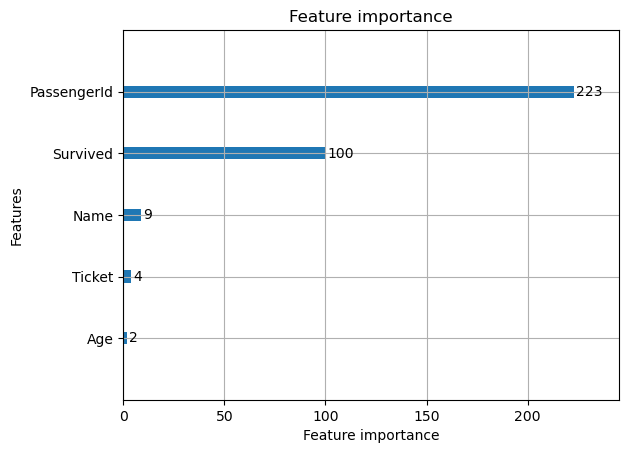

In [35]:
lgb.plot_importance(model)

In [36]:
# PERFORMANCE METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(x_train)
confusion_matrix(y_pred, y_train)

array([[444,   0],
       [  0, 268]], dtype=int64)

In [37]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       268

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [38]:
!pip install xgboost

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [40]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, x, y, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [42]:
print('avaerage of cv scores', scores.mean())

avaerage of cv scores 1.0


In [43]:
print('cross validation scores', scores)

cross validation scores [1. 1. 1. 1. 1.]


In [44]:
y_pred=model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
#HENCE THIS IS BEST FITTED EXCELLENT MODEL